In [434]:
import numpy as np
from math import sin,cos
import pandas as pd

In [435]:
r = 1
d = 1
kR = 0.01
kL = 0.01

In [436]:
def x_k_1(x_k,delta_R,delta_L,theta_k):
    new_x = x_k + r*(delta_R+delta_L)*cos(theta_k)/2
    return new_x
def y_k_1(y_k,delta_R,delta_L,theta_k):
    new_y = y_k + r*(delta_R+delta_L)*sin(theta_k)/2
    return new_y
def theta_k_1(theta_k,delta_R,delta_L):
    new_theta = theta_k + r*(delta_R-delta_L)/(2*d)
    return new_theta


In [437]:
init_p = np.array([[0.001,0.0,0.0],[0.0,0.001,0.0],[0.0,0.001,1.0]])
p = init_p
def delta_R_L(delta_R,delta_L):
    delta_R_L_martrix = np.array([[kR*abs(delta_R),0],[0,kL*abs(delta_L)]])
    return delta_R_L_martrix

def f_p(delta_R,delta_L,theta_k):
    f_p_martrix = np.array([[1,0,-r*(delta_R+delta_L)*sin(theta_k)/2],[0,1,r*(delta_R+delta_L)*cos(theta_k)/2],[0,0,1]])
    return f_p_martrix

def f_phai(theta_k):
    f_phai_martrix = np.array([[r*cos(theta_k)/2,r*cos(theta_k)/2],[r*sin(theta_k)/2,r*sin(theta_k)/2],[r/(2*d),r/(2*d)]])
    return f_phai_martrix

In [438]:
x = []
y = []
theta = []
x.append(0)
y.append(0)
theta.append(0)
time_list = [0]
x_e = []
y_e = []
theta_e = []
x_e.append(p[0,0])
y_e.append(p[1,1])
theta_e.append(p[2,2])
degree = 1
s = 0
theta_t = 0
for k in range(3000):
    deltaL = 0.001*(1- 2*d*degree*pow(cos(theta[len(theta)-1]),3))
    deltaR = 0.001*(1+ 2*d*degree*pow(cos(theta[len(theta)-1]),3))
    
    time_list.append(k+1)
    s += r*(deltaR+deltaL)/2
    theta_t += (deltaR-deltaL)/(2*d)
    x_e.append(p[0,0])
    y_e.append(p[1,1])
    theta_e.append(p[2,2])

    p += f_p(deltaR,deltaL,theta[len(theta)-1]) @ p @ f_p(deltaR,deltaL,theta[len(theta)-1]).T 
    p += f_phai(theta[len(theta)-1]) @ delta_R_L(deltaR,deltaL) @ f_phai(theta[len(theta)-1]).T

    x.append(x_k_1(x[len(x)-1],deltaR,deltaL,theta[len(theta)-1]))
    y.append(y_k_1(y[len(y)-1],deltaR,deltaL,theta[len(theta)-1]))
    theta.append(theta_k_1(theta[len(theta)-1],deltaR,deltaL))




c:\Users\14251\anaconda3\envs\test001\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in add
c:\Users\14251\anaconda3\envs\test001\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in matmul


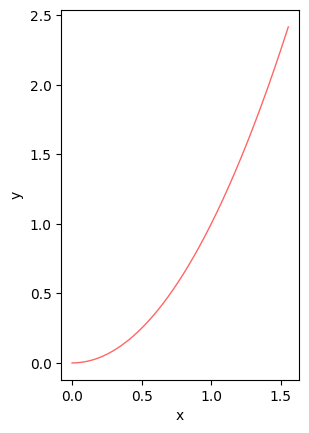

1.5538949828890647
2.4149196866555416
2.9999999999997806
1.2596169206715377


In [439]:
import matplotlib.pyplot as plt

#创建图并命名
plt.figure('Line fig')
ax = plt.gca()
#设置x轴、y轴名称
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')
#画连线图，以x_list中的值为横坐标，以y_list中的值为纵坐标
#参数c指定连线的颜色，linewidth指定连线宽度，alpha指定连线的透明度
ax.plot(x, y, color='r', linewidth=1, alpha=0.6)

plt.show()

print(x[len(x) - 1])
print(y[len(y) - 1])
print(s)
print(theta_t)

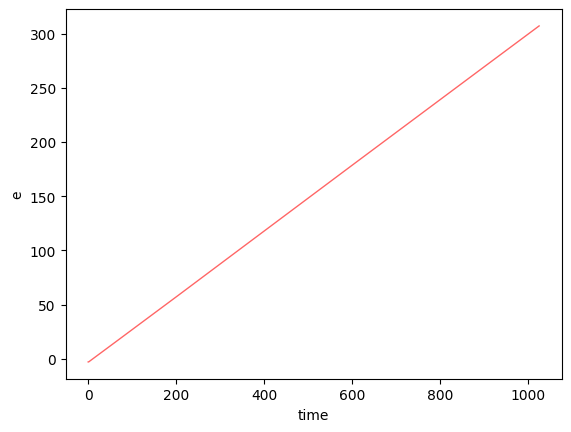

[0, 0.001, 0.0019999980000006664, 0.002999990000059333, 0.003999972000473325, 0.004999940001987922, 0.005999890006004258, 0.006999818014787131, 0.007999720031672685, 0.008999592061275936, 0.00999943010969811, 0.010999230184733765, 0.011998988296077664, 0.012998700455531361, 0.013998362677209475, 0.014997970977745627, 0.015997521376498, 0.016997009895754485, 0.017996432560937407, 0.018995785400807767, 0.019995064447669002, 0.020994265737570208, 0.02199338531050881, 0.022992419210632643, 0.023991363486441413, 0.02499021419098752, 0.025988967382076195, 0.026987619122464935, 0.027986165480062206, 0.028984602528125382, 0.029982926345457885, 0.030981133016605517, 0.031979218632051935, 0.032977179288413254, 0.03397501108863173, 0.034972710142168566, 0.03597027256519567, 0.03696769448078652, 0.03796497201910593, 0.0389621013175989, 0.03995907852117824, 0.040955899782411265, 0.04195256126170525, 0.042949059127491834, 0.04394538955641021, 0.04494154873348915, 0.045937532852327795, 0.046933338115

In [440]:
import matplotlib.pyplot as plt

#创建图并命名
plt.figure('Line fig')
ax = plt.gca()
#设置x轴、y轴名称
ax.set_xlabel('time')
ax.set_ylabel('e')
ax.plot(time_list,np.log10(x_e) , color='r', linewidth=1, alpha=0.6)

plt.show()
print(x)
